# import

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import gender_guesser.detector as gender

import matplotlib.pyplot as plt 
from datetime import datetime
from sklearn import metrics
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [2]:
def predict_sex(name):
    name=str(name).split(' ')[0]
    sex_prediction = gender.Detector(case_sensitive=False)
    sex=sex_prediction.get_gender(name)
    sex_dic={'female':2,"male":1,'unknown':0,'mostly_female':-2 ,'mostly_male':-1,'andy':-3}
    return sex_dic[sex]

def creation_year(year):
    try:
        dt = datetime.strptime(str(year), '%Y-%m-%d %H:%M:%S')
        return dt.year
    except:
        return 0

def set_sex_code(x):
    x.loc[:,'sex_code']=predict_sex(x['name'])



# load data

In [4]:
data = pd.read_csv('./Data/featuresfloatv2.csv')
data=data.loc[:,['verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore','avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week','fake_follower','account_type']]
def extract_features(x):
    # x.loc[:,'sex_code']=x.apply(lambda row :predict_sex(row["display_name"]), axis=1)
    # print('sex code done')
    # x.loc[:,'created'] = x.apply(lambda row :creation_year(row["date_joined"]), axis=1)
    # print('created done')
    # x.loc[:,'most_recent_post'] = x.apply(lambda row :creation_year(row["most_recent_post"]), axis=1)
    # print('most_recent_post done')

    x=x.loc[:,['verified','statuses','location','date_joined','most_recent_post','following','followers','likes','lists','tweet_language','tweets_this_week','retweet_ratio','retweeted_count','URL works','userNameScore','avg_tweets_by_hour_of_day','avg_tweets_by_day_of_week']]
    return x


In [6]:
x=extract_features(data)



scale features

In [10]:

from sklearn.preprocessing import StandardScaler

# Create an instance of StandardScaler
scaler = StandardScaler()

# Fit the scaler to your data
scaler.fit(x)

# Transform your data using the scaler
X_scaled = scaler.transform(x)
print(X_scaled)


[[-0.51154988 -0.21077824  0.77816844 ...  0.10200809 -2.55410075
  -2.55408081]
 [-0.51154988 -0.29802842  0.77816844 ...  0.76871714 -1.78265242
  -1.78266088]
 [-0.51154988 -0.11872343 -1.28506882 ... -1.23141002  0.56370771
   0.56377423]
 ...
 [-0.51154988 -0.21613235 -1.28506882 ...  1.49098528  0.66013875
   0.66018766]
 [ 1.95484357 -0.26851057  0.77816844 ... -0.36715754  0.66013875
   0.66018766]
 [-0.51154988 -0.25591117 -1.28506882 ...  1.0313601   0.59610854
   0.59594954]]



 Training Accuracy score: 0.9999632825408482
Testing Accuracy score: 0.899691584667352
RandomForestClassifier score: 0.9999632825408482
classification_report 
               precision    recall  f1-score   support

         bot       0.89      0.80      0.84      2309
       human       0.90      0.95      0.93      4500

    accuracy                           0.90      6809
   macro avg       0.90      0.88      0.89      6809
weighted avg       0.90      0.90      0.90      6809



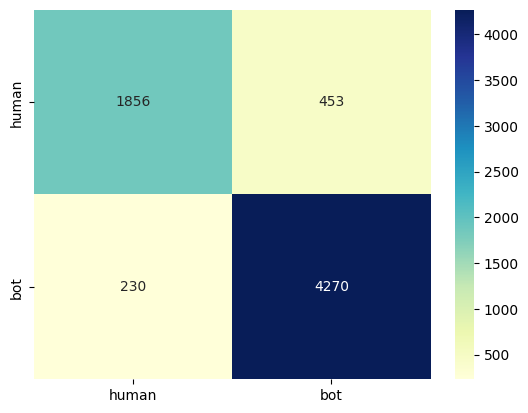

In [11]:

clf=RandomForestClassifier()
# ,'description','location','url','sex_code','verified','created','sex_code','tweet_language','tweets_by_day_of_week','tweets_by_hour_of_day'

y = data.account_type.values.tolist()
x_train, x_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42,stratify=y)
clf.fit(x_train,y_train)
y_pred_train = clf.predict(x_train)
y_pred_test = clf.predict(x_test)
print("\n Training Accuracy score:",metrics.accuracy_score(y_train, y_pred_train))
print("Testing Accuracy score:",metrics.accuracy_score(y_test, y_pred_test))
print("RandomForestClassifier score:",clf.score(x_train, y_train))
print("classification_report \n "+classification_report(y_test, y_pred_test))
cm = metrics.confusion_matrix(y_test, y_pred_test)
# print('Confusion matrix\n', cm)

cm_matrixNB = pd.DataFrame(data=cm, columns=[ 'human', 'bot'], 
                        index=[ 'human', 'bot'])
sns.heatmap(cm_matrixNB, annot=True, fmt='d', cmap='YlGnBu')
plt.show()
   
